In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from statsmodels.tsa.stattools import acf,adfuller,pacf
from statsmodels.tsa.arima_model import ARIMA
import math

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (12,6)

import warnings
warnings.filterwarnings('ignore')

Beer Production I

DESCRIPTION

The Beer production dataset provides a time series data for monthly beer production in Australia, for the period Jan 1956 – Aug 1995.

Objective:

• Check for the stationarity of your data using Rolling Statistics and Dickey-Fuller test.

• If stationarity is present, remove it using differencing in Python.

In [25]:
df = pd.read_csv('/content/monthly-beer-production-in-austr.csv')

In [26]:
df.head()

,Month,Monthly beer production in Australia
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [27]:
df.tail(3)

,Month,Monthly beer production in Australia
473,1995-06,130.0
474,1995-07,119.0
475,1995-08,153.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Month                                 476 non-null    object 
 1   Monthly beer production in Australia  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [29]:
x = '1995-06'
x[:4],x[5:]

('1995', '06')

In [30]:
df['Month'] = df['Month'].apply(lambda x: dt(int(x[:4]),int(x[5:]),15)) #convert monthly data to a particular date

In [31]:
df.head(2)

,Month,Monthly beer production in Australia
0,1956-01-15,93.2
1,1956-02-15,96.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Month                                 476 non-null    datetime64[ns]
 1   Monthly beer production in Australia  476 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB


In [33]:
# setting Month as index column
df.set_index("Month", inplace = True)

In [34]:
df.head(2)

,Monthly beer production in Australia
Month,
1956-01-15,93.2
1956-02-15,96.0


In [35]:
df.columns = ['Beer_production'] #convert column name to a shortned format

In [36]:
ts = df[['Beer_production']]

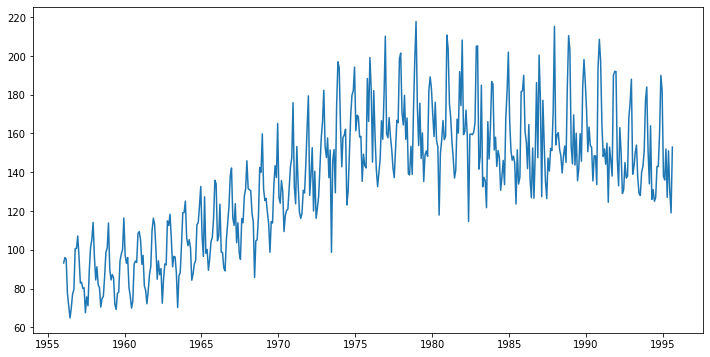

In [37]:
plt.plot(ts)

In [38]:
ts_log = np.log(ts)

  the null and alternative hypotheses of this test:
The null hypothesis: the distribution is non-stationary, time-dependent (it has a unit root).
The alternative hypothesis: the distribution is stationary, not time-dependent (can’t be represented by a unit root).
The p-value determines the result of the test. If it is smaller than a critical threshold of 0.05 or 0.01, we reject the null hypothesis and conclude that the series is stationary. Otherwise, we fail to reject the null and conclude the series is non-stationary.

In [39]:
#function to test stationarity
def test_stationarity(timeseries):
  rolmean = timeseries.rolling(window=52,center=False).mean()
  rolstd = timeseries.rolling(window=52,center=False).std()

  orig = plt.plot(timeseries,color='blue',label='orginal')
  mean_roll = plt.plot(rolmean,color='red',label='rolling mean')
  std_roll = plt.plot(rolstd,color='green',label='rolling std')
  plt.legend()
  plt.title('Rolling Mean and Std')
  plt.show(block=False)

  #Dickey Fuller Test
  dftest = adfuller(timeseries,autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test_stat','pvalue','#lags Used','No of obs used'])
  
  for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value
  print(dfoutput)

In [41]:
ts.head()

,Beer_production
Month,
1956-01-15,93.2
1956-02-15,96.0
1956-03-15,95.2
1956-04-15,77.1
1956-05-15,70.9


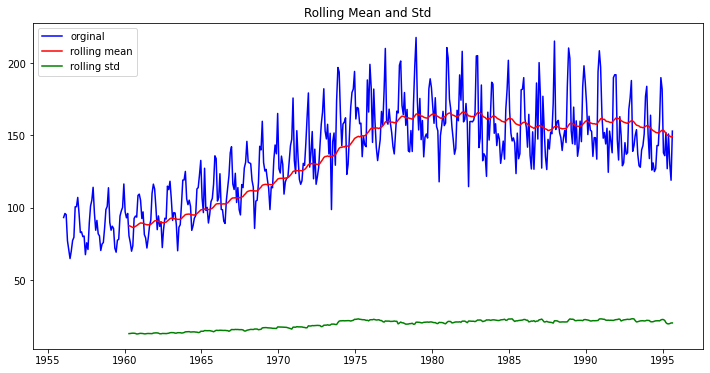

Test_stat                -2.282661
pvalue                    0.177621
#lags Used               17.000000
No of obs used          458.000000
Critical value (1%)      -3.444709
Critical value (5%)      -2.867871
Critical value (10%)     -2.570142
dtype: float64


In [42]:
test_stationarity(ts['Beer_production'])

As p value is not less that 0.05 the Fail to reject H0. The ts is not stationary

In [48]:
# taking first second and third order diff
ts["diff_1"] = ts['Beer_production'].diff(periods=1)
ts["diff_2"] = ts['Beer_production'].diff(periods=2)
ts["diff_3"] = ts['Beer_production'].diff(periods=3)

ts.head(6)

,Beer_production,diff_1,diff_2,diff_3
Month,,,,
1956-01-15,93.2,NaN,NaN,NaN
1956-02-15,96.0,2.8,NaN,NaN
1956-03-15,95.2,-0.8,2.0,NaN
1956-04-15,77.1,-18.1,-18.9,-16.1
1956-05-15,70.9,-6.2,-24.3,-25.1
1956-06-15,64.8,-6.1,-12.3,-30.4


In [49]:
ts.dropna(inplace=True)

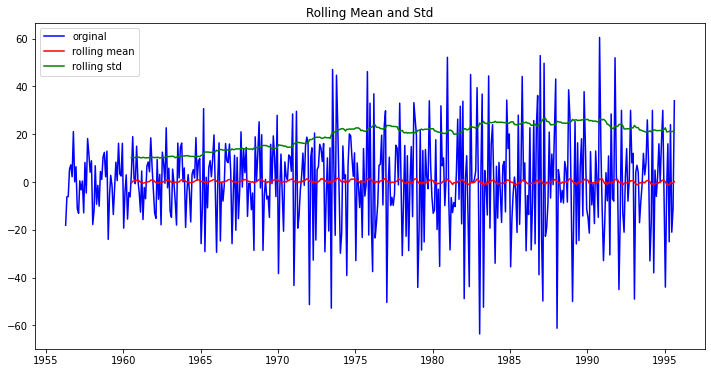

Test_stat                -4.956027
pvalue                    0.000027
#lags Used               18.000000
No of obs used          454.000000
Critical value (1%)      -3.444836
Critical value (5%)      -2.867927
Critical value (10%)     -2.570172
dtype: float64


In [50]:
test_stationarity(ts['diff_1'])

As we see the p value is less than 0.05 and first diff itself is stationary now.